# Bank Marketing Dataset

## Import Libraries

In [277]:
import numpy as np
import pandas as pd
import re
#for EDA
from ydata_profiling import ProfileReport

#for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#for preprocessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, OrdinalEncoder, OneHotEncoder

#for model
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.naive_bayes import GaussianNB as nb
from sklearn.linear_model import LogisticRegression as lr
from sklearn.tree import DecisionTreeClassifier as dt 
from sklearn.svm import SVC as vc
from sklearn.ensemble import RandomForestClassifier as rcl
import sklearn.metrics as sm

## Loading the Dataset

### Importing data

In [278]:
Bank_data = pd.read_csv('data/bank-full.csv', sep=";")
Bank_data.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [279]:
Bank_data.describe().T

count         mean          std     min    25%    50%     75%  \
age       45211.0    40.936210    10.618762    18.0   33.0   39.0    48.0   
balance   45211.0  1362.272058  3044.765829 -8019.0   72.0  448.0  1428.0   
day       45211.0    15.806419     8.322476     1.0    8.0   16.0    21.0   
duration  45211.0   258.163080   257.527812     0.0  103.0  180.0   319.0   
campaign  45211.0     2.763841     3.098021     1.0    1.0    2.0     3.0   
pdays     45211.0    40.197828   100.128746    -1.0   -1.0   -1.0    -1.0   
previous  45211.0     0.580323     2.303441     0.0    0.0    0.0     0.0   

               max  
age           95.0  
balance   102127.0  
day           31.0  
duration    4918.0  
campaign      63.0  
pdays        871.0  
previous     275.0

In [280]:
Bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [281]:
Bank_data.duplicated().sum()

0

In [282]:
Bank_data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

It can be observed that there are no columns containing NaN values. However, this does not prove that the dataset is free from data missings, and it is very possible that the dataset uses some specical characters to represent missing values. We will attempt to explore this by extracting unique values from a categorical column.

In [283]:
Bank_data['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

From the above result, we see that there is an unique value 'unknown' in the dataset and it definitely represents a missing value. So we will replace all of 'unknown' with NaN values for the ease of further analysis.

In [284]:
print('Before:')
print(Bank_data.isna().sum())
Bank_data = Bank_data.replace(to_replace='unknown', value=np.nan)
print('After:')
Bank_data.isna().sum()

Before:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
After:


age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64

### Data Dictionary

1. Categorical Attributes

In [285]:
categorical_columns = list(Bank_data.select_dtypes(include=['object']).columns)
categorical_columns.remove('y')
categorical_columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

2. Numerical Attributes

In [286]:
numerical_columns = list(Bank_data.select_dtypes(include=['int64', 'float64']).columns)
numerical_columns

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

## Data Exploration and Visualization

In [287]:
profile = ProfileReport(Bank_data, title = "Pandas Profiling Report for Bank Marketing dataset")
profile.to_file(output_file="Bank_profiling.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [288]:
profile

### Categorical Column Analysis

#### Job

'job' is not biased so we can check for it's connections with the other columns to find a suitable value for NaN replacement. In theory, 'Job' is kinda related to 'education' since there are some jobs that require a high level of education, while others do not. 

In [289]:
Bank_data.groupby(['education', 'job']).size()

education  job          
primary    admin.            209
           blue-collar      3758
           entrepreneur      183
           housemaid         627
           management        294
           retired           795
           self-employed     130
           services          345
           student            44
           technician        158
           unemployed        257
secondary  admin.           4219
           blue-collar      5371
           entrepreneur      542
           housemaid         395
           management       1121
           retired           984
           self-employed     577
           services         3457
           student           508
           technician       5229
           unemployed        728
tertiary   admin.            572
           blue-collar       149
           entrepreneur      686
           housemaid         173
           management       7801
           retired           366
           self-employed     833
           service

Now, according to the value of 'education', we can replace NaN values with the job that appears the most in each value.

#### Education

'education' column has lower null values so we will fill them with a specific method instead of dropping.

#### Contact

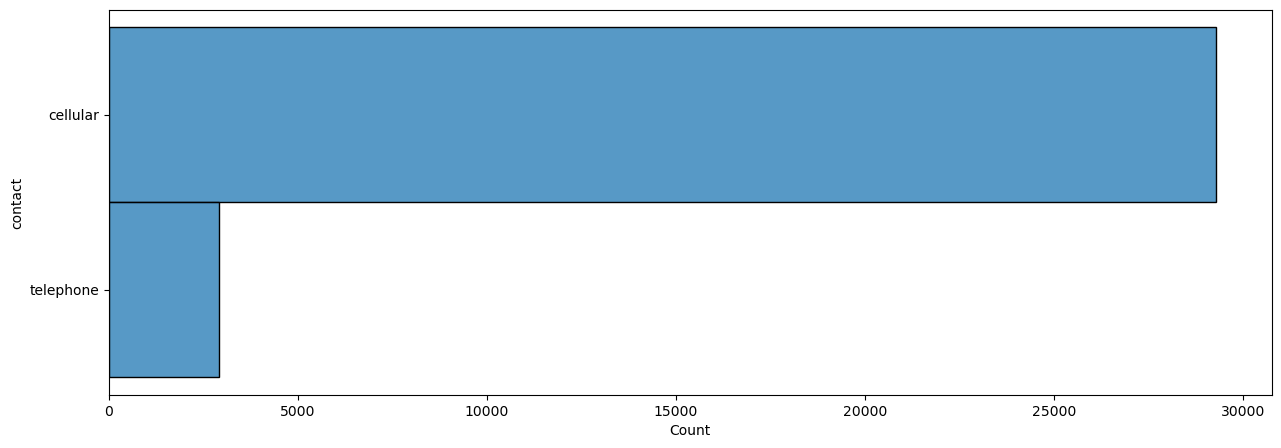

In [290]:
plt.figure(figsize=(15, 5))
sns.histplot(y=Bank_data['contact'])
plt.show()

According to the above plot, it is clear that the 'contact' column is highly imbalanced since most of phone calls are from cellular. Moreover, in my opinion, it doesn't effect to whether if the client will subscribe a term deposit so we can drop it.

#### Month

Since it contains content quite similiar to the 'pdays' column, where one refers to the last contact month of the year while the other is the number of days that passed by after the client was last contacted, we can safely remove it without significantly affecting the dataset.

#### Poutcome

'poutcome' column has an insane number of missing values with more than 81.7% of total values are missing. Therefore, there is no meaning to keep it.

### Numerical Column Analysis

#### Age

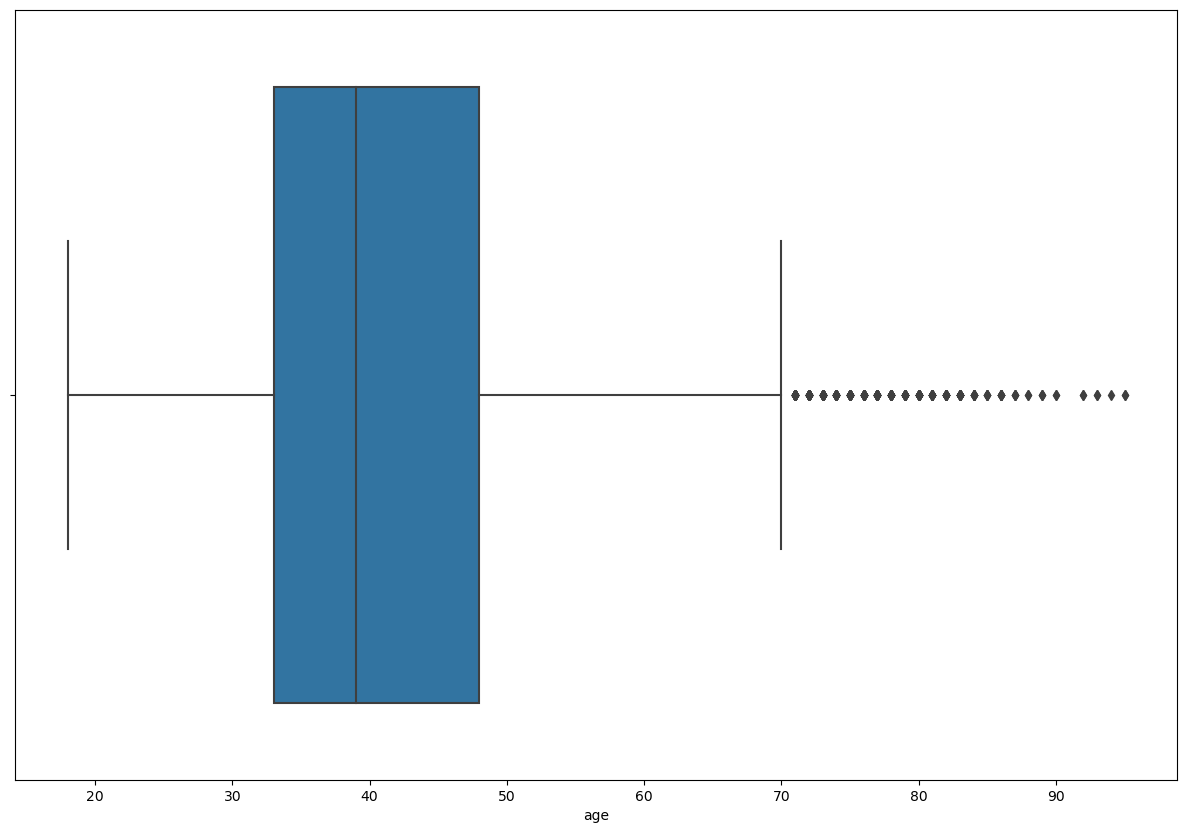

In [291]:
plt.figure(figsize=(15,10))
sns.boxplot(x=Bank_data['age'])
plt.show()

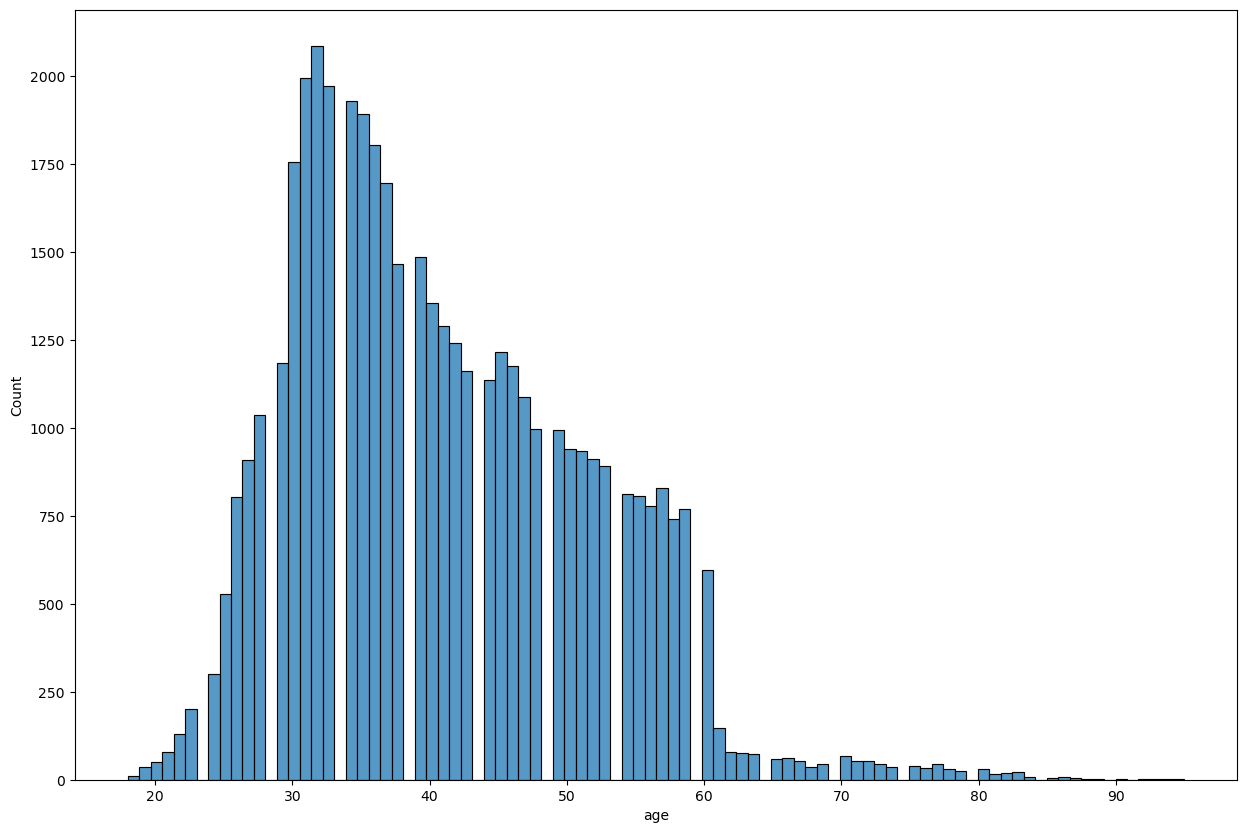

In [292]:
plt.figure(figsize=(15,10))
sns.histplot(x=Bank_data['age'])
plt.show()

Based on the chart, the majority of participants'ages in the survey fall within the range of 27 to 58, with noticeably amount of outliers. Therefore, we can use standard scaling for it and IQR method to deal with outliers.

#### Day

Same as 'month' column, we need to remove due to duplicate content.

## Data Preprocessing

### Null Value Treatment

In [293]:
Bank_data['education'].fillna(method= "ffill", inplace=True)

In [294]:
modes_by_education = Bank_data.groupby('education')['job'].apply(lambda x : x.mode().iloc[0])
Bank_data['job'].fillna(Bank_data['education'].map(modes_by_education), inplace=True)

In [295]:
Bank_data = Bank_data.drop(['contact', 'poutcome', 'month', 'day'], axis=1)

In [296]:
Bank_data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
duration     0
campaign     0
pdays        0
previous     0
y            0
dtype: int64

### Outliers Treatment

In [297]:
def outlier_thresholds(column):
    sorted(column)
    Q1 = np.quantile(column, 0.25)
    Q3 = np.quantile(column, 0.75)
    IQR = Q3-Q1
    lower_bound = Q1-(1.5*IQR)
    upper_bound = Q3+(1.5*IQR)
    return lower_bound, upper_bound


In [298]:
lowerbound, upperbound = outlier_thresholds(Bank_data['age'])
Bank_data['age'].loc[(Bank_data['age'] < lowerbound)] = lowerbound
Bank_data['age'].loc[(Bank_data['age'] > upperbound)] = upperbound

C:\Users\Storm\AppData\Local\Temp\ipykernel_3952\1030729155.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bank_data['age'].loc[(Bank_data['age'] < lowerbound)] = lowerbound


### Encoding the Data

#### Encoding as Binary

In [299]:
mapping = {"no": 0, "yes": 1}
Bank_data['y'] = Bank_data['y'].map(mapping)
Bank_data['loan'] = Bank_data['loan'].map(mapping)
Bank_data['housing'] = Bank_data['housing'].map(mapping)
Bank_data['default'] = Bank_data['default'].map(mapping)

### Ordinal Encoding

In [300]:
ordinal_marital = OrdinalEncoder(categories=[['single', 'married', 'divorced']], dtype=np.int64)
Bank_data['marital'] = ordinal_marital.fit_transform(Bank_data[['marital']])
ordinal_education = OrdinalEncoder(categories=[['primary', 'secondary', 'tertiary']], dtype=np.int64)
Bank_data['education'] = ordinal_education.fit_transform(Bank_data[['education']])

#### One Hot Encoding

In [301]:
ohe = ['job']
Bank_data = pd.get_dummies(Bank_data, columns=ohe, dtype=np.int64)

### Scaling the Data

#### Standard Scaling

In [302]:
Standard_scaler = StandardScaler()
numerical_columns.remove('day')
Bank_data[numerical_columns] = Standard_scaler.fit_transform(Bank_data[numerical_columns])

## Model Building

In [303]:
Bank_data

age  marital  education  default   balance  housing  loan  \
0      1.648117        1          2        0  0.256419        1     0   
1      0.301287        0          1        0 -0.437895        1     0   
2     -0.756936        1          1        0 -0.446762        1     1   
3      0.589894        1          1        0  0.047205        1     0   
4     -0.756936        0          1        0 -0.447091        0     0   
...         ...      ...        ...      ...       ...      ...   ...   
45206  0.974702        1          2        0 -0.176460        0     0   
45207  2.850644        2          0        0  0.120447        0     0   
45208  2.850644        1          1        0  1.429593        0     0   
45209  1.551915        1          1        0 -0.228024        0     0   
45210 -0.372128        1          1        0  0.528364        0     0   

       duration  campaign     pdays  ...  job_blue-collar  job_entrepreneur  \
0      0.011016 -0.569351 -0.411453  ...                0                 0   
1     -0.416127 -0.569351 -0.411453  ...                0                 0   
2     -0.707361 -0.569351 -0.411453  ...                0                 1   
3     -0.645231 -0.569351 -0.411453  ...                1                 0   
4     -0.233620 -0.569351 -0.411453  ...                1                 0   
...         ...       ...       ...  ...              ...               ...   
45206  2.791329  0.076230 -0.411453  ...                0                 0   
45207  0.768224 -0.246560 -0.411453  ...                0                 0   
45208  3.373797  0.721811  1.436189  ...                0                 0   
45209  0.970146  0.399020 -0.411453  ...                1                 0   
45210  0.399328 -0.246560  1.476138  ...                0                 1   

       job_housemaid  job_management  job_retired  job_self-employed  \
0                  0               1            0                  0   
1                  0               0            0                  0   
2                  0               0            0                  0   
3                  0               0            0                  0   
4                  0               0            0                  0   
...              ...             ...          ...                ...   
45206              0               0            0                  0   
45207              0               0            1                  0   
45208              0               0            1                  0   
45209              0               0            0                  0   
45210              0               0            0                  0   

       job_services  job_student  job_technician  job_unemployed  
0                 0            0               0               0  
1                 0            0               1               0  
2                 0            0               0               0  
3                 0            0               0               0  
4                 0            0               0               0  
...             ...          ...             ...             ...  
45206             0            0               1               0  
45207             0            0               0               0  
45208             0            0               0               0  
45209             0            0               0               0  
45210             0            0               0               0  

[45211 rows x 23 columns]

In [304]:
features = Bank_data[Bank_data.columns.difference(['y'])]
target = Bank_data['y']
features

age   balance  campaign  default  duration  education  housing  \
0      1.648117  0.256419 -0.569351        0  0.011016          2        1   
1      0.301287 -0.437895 -0.569351        0 -0.416127          1        1   
2     -0.756936 -0.446762 -0.569351        0 -0.707361          1        1   
3      0.589894  0.047205 -0.569351        0 -0.645231          1        1   
4     -0.756936 -0.447091 -0.569351        0 -0.233620          1        0   
...         ...       ...       ...      ...       ...        ...      ...   
45206  0.974702 -0.176460  0.076230        0  2.791329          2        0   
45207  2.850644  0.120447 -0.246560        0  0.768224          0        0   
45208  2.850644  1.429593  0.721811        0  3.373797          1        0   
45209  1.551915 -0.228024  0.399020        0  0.970146          1        0   
45210 -0.372128  0.528364 -0.246560        0  0.399328          1        0   

       job_admin.  job_blue-collar  job_entrepreneur  ...  job_retired  \
0               0                0                 0  ...            0   
1               0                0                 0  ...            0   
2               0                0                 1  ...            0   
3               0                1                 0  ...            0   
4               0                1                 0  ...            0   
...           ...              ...               ...  ...          ...   
45206           0                0                 0  ...            0   
45207           0                0                 0  ...            1   
45208           0                0                 0  ...            1   
45209           0                1                 0  ...            0   
45210           0                0                 1  ...            0   

       job_self-employed  job_services  job_student  job_technician  \
0                      0             0            0               0   
1                      0             0            0               1   
2                      0             0            0               0   
3                      0             0            0               0   
4                      0             0            0               0   
...                  ...           ...          ...             ...   
45206                  0             0            0               1   
45207                  0             0            0               0   
45208                  0             0            0               0   
45209                  0             0            0               0   
45210                  0             0            0               0   

       job_unemployed  loan  marital     pdays  previous  
0                   0     0        1 -0.411453 -0.251940  
1                   0     0        0 -0.411453 -0.251940  
2                   0     1        1 -0.411453 -0.251940  
3                   0     0        1 -0.411453 -0.251940  
4                   0     0        0 -0.411453 -0.251940  
...               ...   ...      ...       ...       ...  
45206               0     0        1 -0.411453 -0.251940  
45207               0     0        2 -0.411453 -0.251940  
45208               0     0        1  1.436189  1.050473  
45209               0     0        1 -0.411453 -0.251940  
45210               0     0        1  1.476138  4.523577  

[45211 rows x 22 columns]

### Train-test splitting

In [305]:
feature_train, feature_test, label_train, label_test = train_test_split(features, target, test_size=0.2, random_state=42)

### Model

#### Accuracy calculating

In [306]:
def calc_accuracy(method, label_test, pred):
  print("accuracy score for ", method, sm.accuracy_score(label_test,pred))
  print("precision_score for ", method, sm.precision_score(label_test,pred,average='micro'))
  print("f1 score for ", method, sm.f1_score(label_test,pred,average='micro'))
  print("recall score for ", method, sm.recall_score(label_test,pred,average='micro'))
  accuracy = sm.accuracy_score(label_test,pred)
  return accuracy

#### Logistic Regression

In [307]:
clf = lr()
clf.fit(feature_train, label_train)

LogisticRegression()

In [308]:
pred = clf.predict(feature_test)
lr_accuracy = calc_accuracy("Logistic Regression", label_test, pred)

accuracy score for  Logistic Regression 0.8877584872276899
precision_score for  Logistic Regression 0.8877584872276899
f1 score for  Logistic Regression 0.88775848722769
recall score for  Logistic Regression 0.8877584872276899


#### Gaussian Naive Bayes

In [309]:
clf = nb()
clf.fit(feature_train, label_train)

GaussianNB()

In [310]:
pred = clf.predict(feature_test)
nb_accuracy = calc_accuracy("Gaussian Naive Bayes", label_test, pred)

accuracy score for  Gaussian Naive Bayes 0.8220723211323676
precision_score for  Gaussian Naive Bayes 0.8220723211323676
f1 score for  Gaussian Naive Bayes 0.8220723211323676
recall score for  Gaussian Naive Bayes 0.8220723211323676


#### Linear Support Vector Machine

In [311]:
clf = vc(C=10, gamma=0.1, kernel='rbf')
clf.fit(feature_train, label_train)

SVC(C=10, gamma=0.1)

In [312]:
pred = clf.predict(feature_test)
svc_accuracy = calc_accuracy("SVC", label_test, pred)

accuracy score for  SVC 0.8912971359062258
precision_score for  SVC 0.8912971359062258
f1 score for  SVC 0.8912971359062258
recall score for  SVC 0.8912971359062258


#### K-Nearest Neighbors

In [313]:
clf = knn(n_neighbors=25)
clf.fit(feature_train, label_train)

KNeighborsClassifier(n_neighbors=25)

In [314]:
pred = clf.predict(feature_test.values)
knn_accuracy = calc_accuracy("KNN", label_test, pred)

c:\Users\Storm\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


accuracy score for  KNN 0.8878690699988941
precision_score for  KNN 0.8878690699988941
f1 score for  KNN 0.8878690699988941
recall score for  KNN 0.8878690699988941


#### Decision Tree Classifier

In [315]:
clf = dt(min_impurity_decrease=0.05)
clf.fit(feature_train, label_train)

DecisionTreeClassifier(min_impurity_decrease=0.05)

In [316]:
pred = clf.predict(feature_test)
dt_accuracy = calc_accuracy("Decision Tree Classifer", label_test, pred)

accuracy score for  Decision Tree Classifer 0.8793541966161672
precision_score for  Decision Tree Classifer 0.8793541966161672
f1 score for  Decision Tree Classifer 0.8793541966161672
recall score for  Decision Tree Classifer 0.8793541966161672


## Evaluation

<function matplotlib.pyplot.show(close=None, block=None)>

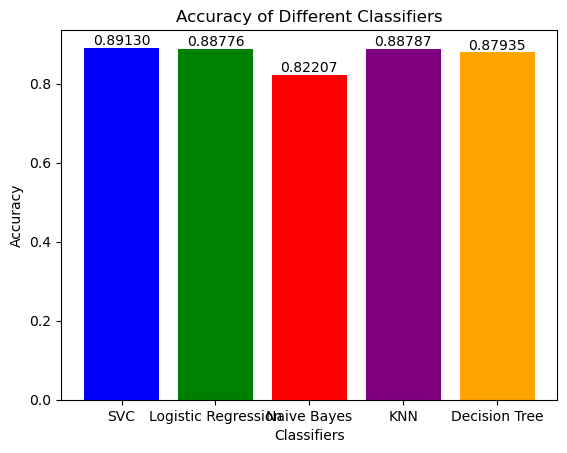

In [317]:
algorithms = ["SVC", "Logistic Regression", "Naive Bayes", "KNN", "Decision Tree"]
accuracy = [svc_accuracy, lr_accuracy, nb_accuracy, knn_accuracy, dt_accuracy]
colors = ['blue', 'green', 'red', 'purple', 'orange']
plt.bar(algorithms, accuracy, color = colors)
plt.xlabel("Classifiers")
plt.ylabel("Accuracy")
plt.title("Accuracy of Different Classifiers")
for i in range(len(algorithms)):
    plt.text(algorithms[i], accuracy[i], f'{accuracy[i]:.5f}', ha='center', va='bottom')
plt.show